In [38]:
import pubchempy as pcp
import pandas as pd
import random, time
import re
import rdkit.Chem
import rdkit.Chem.AllChem
import seaborn as sns
import numpy as np

In [2]:
compoundnames = pd.read_csv("ComboCompoundNames_small.txt", sep='\t')

In [ ]:
for x in set(compoundnames['Drug'].unique()): print(x)

In [ ]:
# 用pubchem搜索ichikey
#https://pubchem.ncbi.nlm.nih.gov/idexchange/idexchange.cgi

In [15]:
helper4ichikey = pd.read_csv("helper4R.txt",sep='\t', header=None)
helper4ichikey.columns = ['drug_name',"ichikey"]
helper4ichikey = helper4ichikey.drop_duplicates(subset=['drug_name'], keep="first")

In [21]:
helper4ichikey

,drug_name,ichikey
0,Clofarabine,WDDPHFBMKLOVOX-AYQXTPAHSA-N
1,Raloxifene hydrochloride,BKXVVCILCIUCLG-UHFFFAOYSA-N
2,Nelarabine,IXOXBSCIXZEQEQ-UHTZMRCNSA-N
3,Etoposide,VJJPUSNTGOMMGY-MRVIYFEKSA-N
4,Lapatinib ditosylate,UWYXLGUQQFPJRI-UHFFFAOYSA-N
...,...,...
178,Triethylenemelamine,IUCJMVBFZDHPDX-UHFFFAOYSA-N
179,Azacitidine,NMUSYJAQQFHJEW-KVTDHHQDSA-N
180,Busulfan,COVZYZSDYWQREU-UHFFFAOYSA-N
181,Topotecan hydrochloride,DGHHQBMTXTWTJV-BQAIUKQQSA-N


In [ ]:
for x in helper4ichikey['ichikey']: print(x)
    # 用classifire搜索
    #https://cfb.fiehnlab.ucdavis.edu/

In [19]:
batch_classifire = pd.read_csv("classyfire_.csv")

In [22]:
pd.merge(helper4ichikey,batch_classifire,left_on='ichikey',right_on='InChIKey')

,drug_name,ichikey,InChIKey,ClassyFy Status,Kingdom,Superclass,Class,Subclass,Parent Level 1,Parent Level 2,Parent Level 3,Parent Level 4
0,Clofarabine,WDDPHFBMKLOVOX-AYQXTPAHSA-N,WDDPHFBMKLOVOX-AYQXTPAHSA-N,Completed,Organic compounds,"Nucleosides, nucleotides, and analogues",Purine nucleosides,Purine 2'-deoxyribonucleosides,Purine 2'-deoxyribonucleosides,NaN,NaN,NaN
1,Raloxifene hydrochloride,BKXVVCILCIUCLG-UHFFFAOYSA-N,BKXVVCILCIUCLG-UHFFFAOYSA-N,Completed,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Carbonyl compounds,Ketones,Aryl ketones,Phenylketones,Aryl-phenylketones
2,Nelarabine,IXOXBSCIXZEQEQ-UHTZMRCNSA-N,IXOXBSCIXZEQEQ-UHTZMRCNSA-N,Completed,Organic compounds,"Nucleosides, nucleotides, and analogues",Purine nucleosides,NaN,Purine nucleosides,NaN,NaN,NaN
3,Etoposide,VJJPUSNTGOMMGY-MRVIYFEKSA-N,VJJPUSNTGOMMGY-MRVIYFEKSA-N,Completed,Organic compounds,"Lignans, neolignans and related compounds",Lignan lactones,Podophyllotoxins,Podophyllotoxins,NaN,NaN,NaN
4,Lapatinib ditosylate,UWYXLGUQQFPJRI-UHFFFAOYSA-N,UWYXLGUQQFPJRI-UHFFFAOYSA-N,Completed,Organic compounds,Organoheterocyclic compounds,Diazanaphthalenes,Benzodiazines,Quinazolines,Quinazolinamines,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Triethylenemelamine,IUCJMVBFZDHPDX-UHFFFAOYSA-N,IUCJMVBFZDHPDX-UHFFFAOYSA-N,Completed,Organic compounds,Organic nitrogen compounds,Organonitrogen compounds,Amines,Tertiary amines,Tertiary alkylarylamines,Dialkylarylamines,NaN
100,Azacitidine,NMUSYJAQQFHJEW-KVTDHHQDSA-N,NMUSYJAQQFHJEW-KVTDHHQDSA-N,Completed,Organic compounds,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Glycosyl compounds,Glycosylamines,NaN,NaN
101,Busulfan,COVZYZSDYWQREU-UHFFFAOYSA-N,COVZYZSDYWQREU-UHFFFAOYSA-N,Completed,Organic compounds,Organic acids and derivatives,Organic sulfonic acids and derivatives,Organosulfonic acids and derivatives,Organosulfonic acid esters,NaN,NaN,NaN
102,Topotecan hydrochloride,DGHHQBMTXTWTJV-BQAIUKQQSA-N,DGHHQBMTXTWTJV-BQAIUKQQSA-N,Completed,Organic compounds,Alkaloids and derivatives,Camptothecins,NaN,Camptothecins,NaN,NaN,NaN


### convert web crawler drugs/ almanac combo score's drugs to pubchemID

In [33]:
dcdb_score = pd.read_csv("dcdb_crawler_almanac_withID.csv")

In [34]:
dcdb_score

,drug1,drug2,cellName,HSA,Bliss,Loewe,ZIP,pubchemID_x,pubchemID_y
0,CYTARABINE HYDROCHLORIDE,NSC733504,NCI-H226,0.066454,1.101240,-3.895015,-0.672448,Compound(6252),Compound(6442177)
1,CYTARABINE HYDROCHLORIDE,NSC733504,UACC-62,0.380613,1.906991,-0.833887,-3.006925,Compound(6252),Compound(6442177)
2,CYTARABINE HYDROCHLORIDE,NSC733504,EKVX,0.189652,2.822932,0.167852,-0.210029,Compound(6252),Compound(6442177)
3,CYTARABINE HYDROCHLORIDE,NSC733504,DU-145,2.099788,2.798682,-0.809267,-2.782032,Compound(6252),Compound(6442177)
4,CYTARABINE HYDROCHLORIDE,NSC733504,COLO 205,-1.705684,-2.431513,-4.283340,-0.498853,Compound(6252),Compound(6442177)
...,...,...,...,...,...,...,...,...,...
311593,VANDETANIB,RALOXIFENE,SK-MEL-2,6.820279,10.025902,7.121419,5.184792,Compound(3081361),Compound(5035)
311594,VANDETANIB,RALOXIFENE,SK-MEL-28,11.322946,16.658387,12.057066,10.760758,Compound(3081361),Compound(5035)
311595,VANDETANIB,RALOXIFENE,OVCAR-3,4.320625,4.507935,-1.746247,-0.369569,Compound(3081361),Compound(5035)
311596,VANDETANIB,RALOXIFENE,MDA-MB-231/ATCC,-3.387792,-1.650064,-6.333952,-1.144886,Compound(3081361),Compound(5035)


In [35]:
def get_uniquedrug(subsetdf):
    drug_list = []
    drug1_dc = subsetdf["drug1"].unique()
    drug2_dc = subsetdf["drug2"].unique()
    
    drug_list.append(set(drug1_dc))
    drug_list.append(set(drug2_dc))
    return drug_list


In [36]:
drug_list = get_uniquedrug(dcdb_score)
# One-Liner to union a list of sets
drug_list_set = set().union(*drug_list)

In [37]:
len(drug_list_set)

103

In [38]:
# 1. get pubchemID for each unique drug by using PubChem API

def get_compounds(a_drug):
    return pcp.get_compounds(a_drug, 'name',listkey_count=1)

def get_pubchemID(drug_list_set):
    chemID_list = [ get_compounds(x)[0] if len(get_compounds(x))>0 else "" for x in drug_list_set if time.sleep(0.5) is None]
    print(x for x in drug_list_set)
    return chemID_list

chemID_list = get_pubchemID(drug_list_set)
pubchemIDmapping = pd.DataFrame({
    'drug_name': list(drug_list_set),
    'pubchemID': chemID_list
})
pubchemIDmapping['pubchemID'] = pubchemIDmapping['pubchemID'].astype(str)

<generator object get_pubchemID.<locals>.<genexpr> at 0x7f79fa913ad0>


In [48]:
# pubchemIDmapping.to_csv("pubchemIDmapping_dcdb.csv")
# pubchemIDmapping
pubchemIDmapping = pd.read_csv("pubchemIDmapping_dcdb.csv")

In [49]:
pubchemIDmapping

,drug_name,pubchemID
0,34793-34-5,Compound(3011155)
1,5-FLUORO-2'-DEOXYURIDINE,Compound(5790)
2,5-FU,Compound(3385)
3,ABIRATERONE,Compound(132971)
4,ACTINOMYCIN D,Compound(457193)
...,...,...
98,VINBLASTINE SULFATE,Compound(241902)
99,VINCRISTINE SULFATE,Compound(249332)
100,VISMODEGIB,Compound(24776445)
101,ZOLEDRONIC ACID,Compound(68740)


In [51]:
dcdb_score  = dcdb_score[['drug1','drug2','cellName','HSA','Bliss','Loewe','ZIP']]
dcdb_score

,drug1,drug2,cellName,HSA,Bliss,Loewe,ZIP
0,CYTARABINE HYDROCHLORIDE,NSC733504,NCI-H226,0.066454,1.101240,-3.895015,-0.672448
1,CYTARABINE HYDROCHLORIDE,NSC733504,UACC-62,0.380613,1.906991,-0.833887,-3.006925
2,CYTARABINE HYDROCHLORIDE,NSC733504,EKVX,0.189652,2.822932,0.167852,-0.210029
3,CYTARABINE HYDROCHLORIDE,NSC733504,DU-145,2.099788,2.798682,-0.809267,-2.782032
4,CYTARABINE HYDROCHLORIDE,NSC733504,COLO 205,-1.705684,-2.431513,-4.283340,-0.498853
...,...,...,...,...,...,...,...
311593,VANDETANIB,RALOXIFENE,SK-MEL-2,6.820279,10.025902,7.121419,5.184792
311594,VANDETANIB,RALOXIFENE,SK-MEL-28,11.322946,16.658387,12.057066,10.760758
311595,VANDETANIB,RALOXIFENE,OVCAR-3,4.320625,4.507935,-1.746247,-0.369569
311596,VANDETANIB,RALOXIFENE,MDA-MB-231/ATCC,-3.387792,-1.650064,-6.333952,-1.144886


In [52]:
temp1_dc = pd.merge(dcdb_score, pubchemIDmapping, left_on=['drug1'],right_on=['drug_name'])
temp2_dc = pd.merge(temp1_dc, pubchemIDmapping, left_on=['drug2'],right_on=['drug_name'])

In [53]:
temp2_dc[['drug1','drug2','cellName','HSA','Bliss','Loewe','ZIP','pubchemID_x','pubchemID_y']].to_csv("dcdb_crawler_almanac_withID.csv")

In [54]:
combo_score = pd.read_csv("long_DTP_NCI60_ALMANAC_COMBO_SCORE.csv")
combo_score

,NSC1,NSC2,CELLNAME,COMBO_SCORE,drug1,drug2
0,740,752,MCF7,-57.0,METHOTREXATE,THIOGUANINE
1,740,752,MDA-MB-231,19.0,METHOTREXATE,THIOGUANINE
2,740,752,HS 578T,8.0,METHOTREXATE,THIOGUANINE
3,740,752,BT-549,-33.0,METHOTREXATE,THIOGUANINE
4,740,752,T-47D,-89.0,METHOTREXATE,THIOGUANINE
...,...,...,...,...,...,...
321295,763371,761432,CAKI-1,5.0,RUXOLITINIB,CABAZITAXEL
321296,763371,761432,RXF 393,36.0,RUXOLITINIB,CABAZITAXEL
321297,763371,761432,SN12C,65.0,RUXOLITINIB,CABAZITAXEL
321298,763371,761432,TK-10,75.0,RUXOLITINIB,CABAZITAXEL


In [55]:
drug_list = get_uniquedrug(combo_score)
# One-Liner to union a list of sets
drug_list_set = set().union(*drug_list)

In [56]:
len(drug_list_set)

104

In [44]:
def get_compounds(a_drug):
    return pcp.get_compounds(a_drug, 'name',listkey_count=1)

def get_pubchemID(drug_list_set):
    chemID_list = [ get_compounds(x)[0] if len(get_compounds(x))>0 else "" for x in drug_list_set if time.sleep(0.5) is None]
    print(x for x in drug_list_set)
    return chemID_list

chemID_list = get_pubchemID(drug_list_set)
pubchemIDmapping = pd.DataFrame({
    'drug_name': list(drug_list_set),
    'pubchemID': chemID_list
})
pubchemIDmapping['pubchemID'] = pubchemIDmapping['pubchemID'].astype(str)

<generator object get_pubchemID.<locals>.<genexpr> at 0x7f79fcbeb450>


In [59]:
# pubchemIDmapping.to_csv("pubchemIDmapping_comboscore.csv")
# pubchemIDmapping
pubchemIDmapping = pd.read_csv("pubchemIDmapping_comboscore.csv")
pubchemIDmapping

,drug_name,pubchemID
0,2-FLUORO ARA-A,Compound(657237)
1,4'-EPIADRIAMYCIN,Compound(41867)
2,7-ETHYL-10-HYDROXYCAMPTOTHECIN,Compound(104842)
3,ABIRATERONE,Compound(132971)
4,ALLOPURINOL,Compound(135401907)
...,...,...
99,VINCRISTINE SULFATE,Compound(249332)
100,VINORELBINE TARTRATE,Compound(11607738)
101,VISMODEGIB,Compound(24776445)
102,VORINOSTAT,Compound(5311)


In [60]:
temp1_dc = pd.merge(combo_score, pubchemIDmapping, left_on=['drug1'],right_on=['drug_name'])
temp2_dc = pd.merge(temp1_dc, pubchemIDmapping, left_on=['drug2'],right_on=['drug_name'])

In [61]:
temp2_dc

,NSC1,NSC2,CELLNAME,COMBO_SCORE,drug1,drug2,drug_name_x,pubchemID_x,drug_name_y,pubchemID_y
0,740,752,MCF7,-57.0,METHOTREXATE,THIOGUANINE,METHOTREXATE,Compound(126941),THIOGUANINE,Compound(2723601)
1,740,752,MDA-MB-231,19.0,METHOTREXATE,THIOGUANINE,METHOTREXATE,Compound(126941),THIOGUANINE,Compound(2723601)
2,740,752,HS 578T,8.0,METHOTREXATE,THIOGUANINE,METHOTREXATE,Compound(126941),THIOGUANINE,Compound(2723601)
3,740,752,BT-549,-33.0,METHOTREXATE,THIOGUANINE,METHOTREXATE,Compound(126941),THIOGUANINE,Compound(2723601)
4,740,752,T-47D,-89.0,METHOTREXATE,THIOGUANINE,METHOTREXATE,Compound(126941),THIOGUANINE,Compound(2723601)
...,...,...,...,...,...,...,...,...,...,...
321295,256942,256439,CAKI-1,-35.0,4'-EPIADRIAMYCIN,IDARUBICIN HYDROCHLORIDE,4'-EPIADRIAMYCIN,Compound(41867),IDARUBICIN HYDROCHLORIDE,Compound(42890)
321296,256942,256439,RXF 393,-25.0,4'-EPIADRIAMYCIN,IDARUBICIN HYDROCHLORIDE,4'-EPIADRIAMYCIN,Compound(41867),IDARUBICIN HYDROCHLORIDE,Compound(42890)
321297,256942,256439,SN12C,-62.0,4'-EPIADRIAMYCIN,IDARUBICIN HYDROCHLORIDE,4'-EPIADRIAMYCIN,Compound(41867),IDARUBICIN HYDROCHLORIDE,Compound(42890)
321298,256942,256439,TK-10,73.0,4'-EPIADRIAMYCIN,IDARUBICIN HYDROCHLORIDE,4'-EPIADRIAMYCIN,Compound(41867),IDARUBICIN HYDROCHLORIDE,Compound(42890)


In [62]:
temp2_dc[['drug1','drug2','CELLNAME',\
          'COMBO_SCORE','pubchemID_x','pubchemID_y']].to_csv("long_DTP_NCI60_ALMANAC_COMBO_SCORE_withID.csv")

### calculate drug similarity for fig2a

In [3]:
combosyn_5scores = pd.read_csv("combosyn_5scores.csv")

In [4]:
combosyn_5scores

,drug1.x,drug2.x,cellName,HSA,Bliss,Loewe,ZIP,pubchemID_x,pubchemID_y,Panel.Name,drug1.y,drug2.y,COMBO_SCORE,HSA_label,Bliss_label,Loewe_label,ZIP_label,COMBO_SCORE_label,pairs_id
1,ELOXATIN,NSC-127716,MCF7,-1.377966,-6.828742,-3.015993,-8.038895,Compound(9887053),Compound(451668),Breast,OXALIPLATIN,DECITABINE,174,NaN,antagonistic,NaN,antagonistic,synergistic,5303
2,ELOXATIN,NSC-127716,OVCAR-5,-0.659085,-4.366091,-1.494063,-6.451006,Compound(9887053),Compound(451668),Ovarian,OXALIPLATIN,DECITABINE,-17,NaN,antagonistic,NaN,antagonistic,NaN,5303
3,ELOXATIN,NSC-127716,HCT-15,0.416454,-0.641716,-0.406074,-6.354587,Compound(9887053),Compound(451668),Colon,OXALIPLATIN,DECITABINE,-42,NaN,NaN,NaN,antagonistic,antagonistic,5303
4,ELOXATIN,NSC-127716,RPMI-8226,1.646454,-2.720383,-1.046069,-2.915002,Compound(9887053),Compound(451668),Leukemia,OXALIPLATIN,DECITABINE,112,NaN,antagonistic,NaN,NaN,synergistic,5303
5,ELOXATIN,NSC-127716,KM12,2.187525,0.539326,0.384204,-6.764390,Compound(9887053),Compound(451668),Colon,OXALIPLATIN,DECITABINE,-31,NaN,NaN,NaN,antagonistic,NaN,5303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298331,ADM HYDROCHLORIDE,RALOXIFENE,SNB-19,3.224435,4.042330,2.963048,1.101523,Compound(32874),Compound(5035),CNS,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,36,NaN,NaN,NaN,NaN,NaN,2355
298332,ADM HYDROCHLORIDE,RALOXIFENE,COLO 205,0.027560,-2.180126,-0.240685,-6.913251,Compound(32874),Compound(5035),Colon,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,-23,NaN,antagonistic,NaN,antagonistic,NaN,2355
298333,ADM HYDROCHLORIDE,RALOXIFENE,T-47D,4.853540,1.758737,0.947440,-2.784725,Compound(32874),Compound(5035),Breast,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,25,NaN,NaN,NaN,NaN,NaN,2355
298334,ADM HYDROCHLORIDE,RALOXIFENE,PC-3,-0.416885,0.747456,-0.416852,0.617558,Compound(32874),Compound(5035),Prostate,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,-6,NaN,NaN,NaN,NaN,NaN,2355


In [5]:
def split_it(compound):
    return int(re.search(r'\((.*?)\)', compound).group(1))

combosyn_5scores['pubchemID_x'] = combosyn_5scores['pubchemID_x'].apply(lambda x: split_it(x))
combosyn_5scores['pubchemID_x'] = combosyn_5scores['pubchemID_x'].astype(int)
combosyn_5scores['pubchemID_y'] = combosyn_5scores['pubchemID_y'].apply(lambda x: split_it(x))
combosyn_5scores['pubchemID_y'] = combosyn_5scores['pubchemID_y'].astype(int)

In [6]:
combosyn_5scores

,drug1.x,drug2.x,cellName,HSA,Bliss,Loewe,ZIP,pubchemID_x,pubchemID_y,Panel.Name,drug1.y,drug2.y,COMBO_SCORE,HSA_label,Bliss_label,Loewe_label,ZIP_label,COMBO_SCORE_label,pairs_id
1,ELOXATIN,NSC-127716,MCF7,-1.377966,-6.828742,-3.015993,-8.038895,9887053,451668,Breast,OXALIPLATIN,DECITABINE,174,NaN,antagonistic,NaN,antagonistic,synergistic,5303
2,ELOXATIN,NSC-127716,OVCAR-5,-0.659085,-4.366091,-1.494063,-6.451006,9887053,451668,Ovarian,OXALIPLATIN,DECITABINE,-17,NaN,antagonistic,NaN,antagonistic,NaN,5303
3,ELOXATIN,NSC-127716,HCT-15,0.416454,-0.641716,-0.406074,-6.354587,9887053,451668,Colon,OXALIPLATIN,DECITABINE,-42,NaN,NaN,NaN,antagonistic,antagonistic,5303
4,ELOXATIN,NSC-127716,RPMI-8226,1.646454,-2.720383,-1.046069,-2.915002,9887053,451668,Leukemia,OXALIPLATIN,DECITABINE,112,NaN,antagonistic,NaN,NaN,synergistic,5303
5,ELOXATIN,NSC-127716,KM12,2.187525,0.539326,0.384204,-6.764390,9887053,451668,Colon,OXALIPLATIN,DECITABINE,-31,NaN,NaN,NaN,antagonistic,NaN,5303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298331,ADM HYDROCHLORIDE,RALOXIFENE,SNB-19,3.224435,4.042330,2.963048,1.101523,32874,5035,CNS,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,36,NaN,NaN,NaN,NaN,NaN,2355
298332,ADM HYDROCHLORIDE,RALOXIFENE,COLO 205,0.027560,-2.180126,-0.240685,-6.913251,32874,5035,Colon,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,-23,NaN,antagonistic,NaN,antagonistic,NaN,2355
298333,ADM HYDROCHLORIDE,RALOXIFENE,T-47D,4.853540,1.758737,0.947440,-2.784725,32874,5035,Breast,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,25,NaN,NaN,NaN,NaN,NaN,2355
298334,ADM HYDROCHLORIDE,RALOXIFENE,PC-3,-0.416885,0.747456,-0.416852,0.617558,32874,5035,Prostate,RALOXIFENE HYDROCHLORIDE,DOXORUBICIN HYDROCHLORIDE,-6,NaN,NaN,NaN,NaN,NaN,2355


In [7]:
bag_molecules = set(combosyn_5scores['pubchemID_x']) | set(combosyn_5scores['pubchemID_y'])

In [86]:
def get_pubchemsdf(cleanID):
    pcp.download('SDF', str(cleanID)+'.sdf', cleanID, 'cid', overwrite=True)
    
for _ in list(bag_molecules):
    try:
        get_pubchemsdf(_)
    except:
        print(_)
        pass


176871


In [8]:
combosyn_5scores['pubchemID_x'] = combosyn_5scores['pubchemID_x'].replace(176871, 176870)
combosyn_5scores['pubchemID_y'] = combosyn_5scores['pubchemID_y'].replace(176871, 176870)

In [105]:
! cat *.sdf > almanac_structures

In [9]:
# Read SDF File for pubchem compounds
supplier = rdkit.Chem.SDMolSupplier('almanac_structures')
bag_molecules = [mol for mol in supplier if mol is not None]

bag_fingerprints = dict()
for mol in bag_molecules:
    pubchem_id = mol.GetProp('PUBCHEM_COMPOUND_CID')
    fingerprint = rdkit.Chem.AllChem.GetMorganFingerprint(mol, 2)
    bag_fingerprints[pubchem_id] = fingerprint

In [10]:
##iterate combosyn_5scores_df to calculate pairwise chemical similarity

similarity = list()
for index, row in combosyn_5scores.iterrows():
    d0 = str(row['pubchemID_x'])
    d1 = str(row['pubchemID_y'])
    fp0 = bag_fingerprints[d0]
    fp1 = bag_fingerprints[d1]
    score = rdkit.DataStructs.DiceSimilarity(fp0, fp1)
    similarity.append(score)

In [11]:
combosyn_5scores['chemical_similarity'] = similarity

/Users/chengqi_xu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


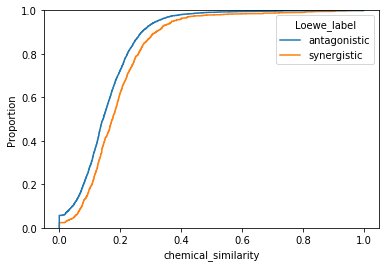

In [12]:
sns.ecdfplot(data=combosyn_5scores, x="chemical_similarity",hue='Loewe_label')

In [ ]:
## calculate target similarity

In [ ]:
# we need to convert pubchemid to drugbank id

In [ ]:
# Read SDF File for Drugbank compounds
drugbank_supplier = rdkit.Chem.SDMolSupplier('drugbank_structures.sdf')
drugbank_molecules = [mol for mol in drugbank_supplier if mol is not None]

In [14]:
len(drugbank_molecules)

11290

In [15]:
# Calculate fingerprints for drugbank
drugbank_fingerprints = dict()
for mol in drugbank_molecules:
    drugbank_id = mol.GetProp('DATABASE_ID')
    fingerprint = rdkit.Chem.AllChem.GetMorganFingerprint(mol, 2)
    drugbank_fingerprints[drugbank_id] = fingerprint

In [16]:
similarity_rows = list()
for id0, fp0 in bag_fingerprints.items():
    for id1,fp1 in drugbank_fingerprints.items():
        similarity = rdkit.DataStructs.DiceSimilarity(fp0, fp1)
        similarity = round(similarity, 4)
        similarity_rows.append([id0, id1, similarity])

In [17]:
similarity_df = pd.DataFrame(similarity_rows, columns=['compound0', 'compound1', 'similarity'])
idx = similarity_df.groupby(by=["compound0"])['similarity'].transform(max) == similarity_df['similarity']
similarity_df = similarity_df[idx]
similarity_df = similarity_df.drop_duplicates(subset=['compound0'])
confident_similarity_df = similarity_df[similarity_df['similarity']>=0.8]
confident_similarity_df

,compound0,compound1,similarity
826,104741,DB00947,1.0000
15932,104842,DB05482,1.0000
27594,11525740,DB06589,0.9942
34125,11607738,DB00361,0.8696
52291,11626560,DB08865,1.0000
...,...,...,...
1095315,72466,DB00290,0.9436
1111558,77082,DB06769,0.9922
1118518,9444,DB00928,1.0000
1130040,9703,DB01168,0.9888


In [19]:
confident_similarity_df['compound0'] = confident_similarity_df['compound0'].astype(int)

/Users/chengqi_xu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
set(confident_similarity_df['compound0']).\
symmetric_difference(set(combosyn_5scores['pubchemID_x']) | set(combosyn_5scores['pubchemID_y']))

{14888, 426756, 439693, 5702198, 9887053, 135398738, 135401907, 135413520}

In [21]:
df2 = pd.DataFrame([[14888, 'DB01169',1], [426756, 'DB00958',1],[439693, 'DB00552',1],\
                   [5702198,'DB00515',1],[9887053,'DB00526',1],[135398738,'DB00851',1],\
                    [135401907,'DB00437',1],[135413520,'DB00642',1]])

In [22]:
df2.columns = confident_similarity_df.columns
confident_similarity_df = confident_similarity_df.append(df2, ignore_index=True)

# confident_similarity_df['compound1'] = confident_similarity_df['compound1'].astype(int)
confident_similarity_df

,compound0,compound1,similarity
0,104741,DB00947,1.0000
1,104842,DB05482,1.0000
2,11525740,DB06589,0.9942
3,11607738,DB00361,0.8696
4,11626560,DB08865,1.0000
...,...,...,...
98,5702198,DB00515,1.0000
99,9887053,DB00526,1.0000
100,135398738,DB00851,1.0000
101,135401907,DB00437,1.0000


In [26]:
temp1_dc = pd.merge(combosyn_5scores, confident_similarity_df, left_on=['pubchemID_x'],right_on=['compound0'], how='inner')
temp2_dc = pd.merge(temp1_dc, confident_similarity_df, left_on=['pubchemID_y'],right_on=['compound0'], how='inner')

In [88]:
dpi = pd.read_csv("../synergyy/results/proessed_dpi.csv",index_col=0)
dpi

,114,117,142,2340,11300,11311,11571,13151,125,155,...,14957,16166,12168,12232,12283,12561,14218,14887,15188,15346
3067,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2162,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# split DB -- unique identifier
def split_it(compound):
    return int(re.split('\d*\D+',compound)[1])
temp2_dc['compound1_x'] = temp2_dc['compound1_x'].apply(lambda x: split_it(x))
temp2_dc['compound1_y'] = temp2_dc['compound1_y'].apply(lambda x: split_it(x))

In [34]:
temp2_dc.columns

Index(['drug1.x', 'drug2.x', 'cellName', 'HSA', 'Bliss', 'Loewe', 'ZIP',
       'pubchemID_x', 'pubchemID_y', 'Panel.Name', 'drug1.y', 'drug2.y',
       'COMBO_SCORE', 'HSA_label', 'Bliss_label', 'Loewe_label', 'ZIP_label',
       'COMBO_SCORE_label', 'pairs_id', 'chemical_similarity', 'compound0_x',
       'compound1_x', 'similarity_x', 'compound0_y', 'compound1_y',
       'similarity_y'],
      dtype='object')

In [89]:
# Now we get drugbank ID for each drug, can be mapped to the dpi.
##iterate combosyn_5scores_df to calculate pairwise drug target similarity
# Dice similarity function
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

tg_similarity = list()
for index, row in temp2_dc.iterrows():
    d0 = str(row['compound1_x'])
    d1 = str(row['compound1_y'])
    try:
        fp0 = dpi[d0]
        fp1 = dpi[d1]
        score = dice(fp0, fp1)
    except:
        score = None
    tg_similarity.append(score)

In [90]:
temp2_dc['tg_similarity'] = tg_similarity

/Users/chengqi_xu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


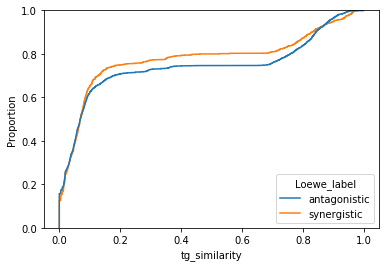

In [91]:
sns.ecdfplot(data=temp2_dc, x="tg_similarity",hue='Loewe_label')

In [86]:
temp2_dc.columns

Index(['drug1.x', 'drug2.x', 'cellName', 'HSA', 'Bliss', 'Loewe', 'ZIP',
       'pubchemID_x', 'pubchemID_y', 'Panel.Name', 'drug1.y', 'drug2.y',
       'COMBO_SCORE', 'HSA_label', 'Bliss_label', 'Loewe_label', 'ZIP_label',
       'COMBO_SCORE_label', 'pairs_id', 'chemical_similarity', 'compound0_x',
       'compound1_x', 'similarity_x', 'compound0_y', 'compound1_y',
       'similarity_y', 'tg_similarity'],
      dtype='object')

In [87]:
temp2_dc[['drug1.x', 'drug2.x', 'cellName', 'HSA', 'Bliss', 'Loewe', 'ZIP','COMBO_SCORE',\
          'pubchemID_x', 'pubchemID_y', 'compound1_x','compound1_y','Panel.Name', \
          'HSA_label', 'Bliss_label', 'Loewe_label', 'ZIP_label',
       'COMBO_SCORE_label', 'pairs_id', 'chemical_similarity','tg_similarity']].to_csv("combosyn_5scores_dbID.csv")